In [1]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def load(path):
    tree = ET.parse(path)
    root = tree.getroot()

    graph_elem = root.find(".//graph")

    G = nx.Graph()

    for node in graph_elem.findall("node"):
        node_id = node.attrib["id"]
        symbol = node.find("attr[@name='symbol']/string").text.strip()
        G.add_node(node_id, label=symbol)

    for edge in graph_elem.findall("edge"):
        u = edge.attrib["from"]
        v = edge.attrib["to"]
        G.add_edge(u, v)

    return G

In [3]:
def draw_molecule(G, title=None):
    pos = nx.spring_layout(G, seed=42)

    labels = nx.get_node_attributes(G, "label")

    plt.figure(figsize=(6, 6))
    nx.draw(
        G, pos=pos,
        labels=labels,
        with_labels=True,
        node_size=800,
        font_size=10
    )

    if title:
        plt.title(title)
    plt.show()

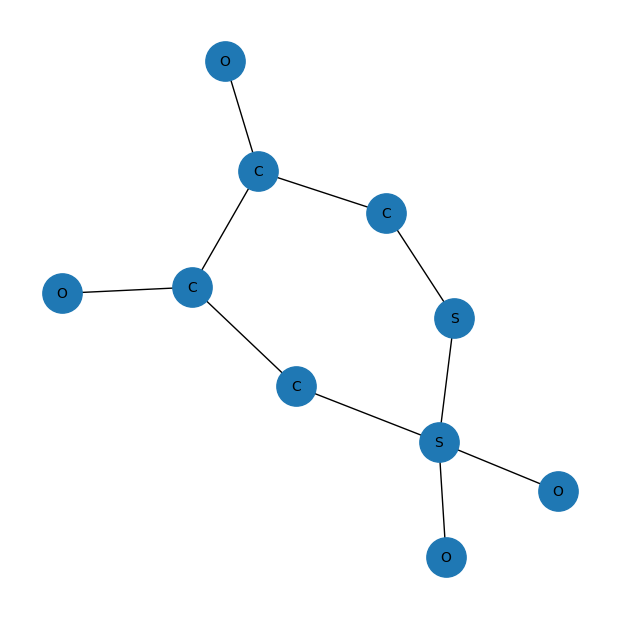

In [4]:
gxl_path = "Molecules/gxl/11808.gxl"  # You can change with other files
G = load(gxl_path)
draw_molecule(G)